# Центральная предельная теорема

## Распределения в python

Импортируем все необходимые библиотеки. Зададим отображение графиков прямо в jupyter. 
По умолчанию, обычно это так и есть, однако стоит на всякий случай задать это явно.



In [16]:
import numpy as np
import pandas as pd
import scipy.stats as sts

import matplotlib.pyplot as plt
import seaborn as sns
# будем отображать графики прямо в jupyter'e
%matplotlib inline
# графики в svg выглядят более четкими
%config InlineBackend.figure_format='svg'
#  применим дефолтный стиль
plt.style.use('default')
# 

Посмотрим на генерацию распределения lognormal.

In [2]:
norm_rv = sts.lognorm(0.25, 0)
norm_rv.rvs(100)

array([0.9673807 , 0.94647055, 1.0993997 , 1.11109275, 1.45757643,
       0.80729165, 1.19430262, 0.83280803, 0.80801557, 0.88412312,
       1.51315387, 1.03474863, 0.71029586, 1.37567159, 0.76371903,
       0.65674636, 0.80821853, 0.83535202, 0.8067294 , 0.70449134,
       0.71638958, 0.92954506, 0.9268534 , 1.23881025, 1.05659341,
       1.66675826, 0.96829174, 1.07759923, 1.09547095, 1.1342371 ,
       1.08538599, 0.697741  , 0.72989614, 1.01399588, 1.07021807,
       1.5817326 , 1.17908169, 0.83779588, 0.7311874 , 0.45043072,
       0.70757663, 1.11235384, 1.37981088, 1.23957534, 1.36920216,
       1.11002783, 1.02229049, 0.80507641, 0.94899932, 0.95544405,
       0.72866035, 0.95088892, 0.69342933, 0.74644962, 0.92835756,
       0.59975239, 0.82652136, 0.82007597, 1.04552627, 0.70403839,
       1.33743536, 0.83696062, 0.98055398, 0.69799965, 1.30157379,
       0.95572749, 0.91966799, 0.62134811, 0.88807102, 0.53412283,
       1.07398512, 0.94278864, 1.15778144, 1.01687016, 1.34929

Для визуализации распределения используем более продвинутый модуль рисования: seaborn. Он позволяет в пару строк (а без подписей и прочего, вообще в одну) показать нам гистограмму случайных значений и кривую плостности распределения.

Для удобства обращения к данным, зададим словарь и взглянем на основные статистики для каждого распределения:

In [9]:
data1 = sts.lognorm(0.25, 0).rvs(1000)
data2 = sts.lognorm(0.5, 0).rvs(1000)
data3 = sts.lognorm(1, 0).rvs(1000)

data = {'$\sigma = 0.25$, $\mu = 0$': data1,
        '$\sigma = 0.5$, $\mu = 0$': data2,
        '$\sigma = 1$, $\mu = 0$': data3}

for key in data:
    print(f'{key} ', sts.describe(data[key]), '\n')

$\sigma = 0.25$, $\mu = 0$  DescribeResult(nobs=1000, minmax=(0.4610007337049299, 2.255472337247749), mean=1.035518973600273, variance=0.06760465496561341, skewness=0.7279879292679373, kurtosis=0.6929540199240516) 

$\sigma = 0.5$, $\mu = 0$  DescribeResult(nobs=1000, minmax=(0.16162138524921185, 6.229347766802712), mean=1.1591305317256786, variance=0.40387546534465435, skewness=2.078889775964214, kurtosis=8.507887542647827) 

$\sigma = 1$, $\mu = 0$  DescribeResult(nobs=1000, minmax=(0.03693973919736823, 19.65974161795171), mean=1.6863794530778093, variance=4.434284247768171, skewness=3.3273605020693346, kurtosis=14.921329131409824) 



Построим график сравнения:

In [11]:
distr = sts.lognorm(0.25, 0)
numb = distr.rvs(1000)
x = np.linspace(distr.ppf(0.01), distr.ppf(0.99), 1000)

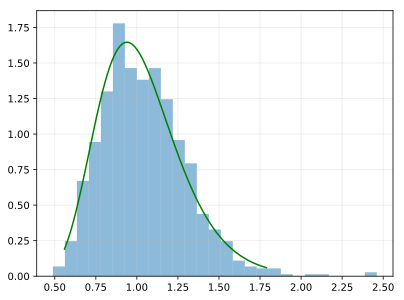

In [19]:
plt.hist(numb, density=True, bins=27, alpha=0.5, label='distr hist')
plt.plot(x, distr.pdf(x), 'g-', label='distr pdf')
plt.grid(alpha=0.25)

/Users/artem/miniconda3/envs/mldaspec/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


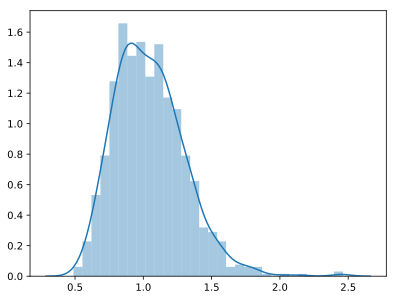

In [22]:
sns.distplot(numb)
plt.show()

/Users/artem/miniconda3/envs/mldaspec/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


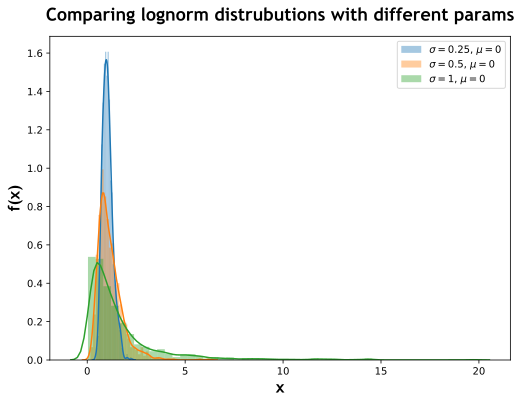

In [20]:
fig, ax = plt.subplots(figsize = (8.27, 11.7/2))

for key in data:
    sns.distplot(data[key], label=key);

plt.ylabel('f(x)', fontsize = 16, \
              fontweight = 'bold', fontname = 'Trebuchet MS')
plt.title('Comparing lognorm distrubutions with different params', y = 1.03, fontsize = 18, \
              fontweight = 'bold', fontname = 'Trebuchet MS')
plt.xlabel('x', fontsize = 16, \
              fontweight = 'bold', fontname = 'Trebuchet MS')
plt.legend();

# ошибка возникает вследтвие того, что в seaborn 0.8.1 еще не обновили инструкции.

Для удобства отображения, подрежем занчения вокруг 0.05 и 0.95 квантилей.

In [6]:
for key in data:
    data[key] = np.array([x for x in data[key] if 
                            (x<np.percentile(data[key], 95) and (x>np.percentile(data[key], 5)))])
    print(key, ' ', data[key].shape)


$\sigma = 0.25$, $\mu = 0$   (900,)
$\sigma = 0.5$, $\mu = 0$   (900,)
$\sigma = 1$, $\mu = 0$   (900,)


Построим график вновь.

/Users/artem/miniconda3/envs/mldaspec/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


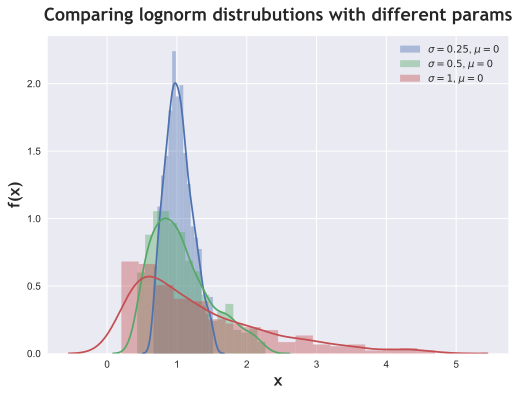

In [7]:
fig, ax = plt.subplots(figsize = (8.27, 11.7/2))

for key in data:
    sns.distplot(data[key], label=key);

plt.ylabel('f(x)', fontsize = 16, \
              fontweight = 'bold', fontname = 'Trebuchet MS')
plt.title('Comparing lognorm distrubutions with different params', y = 1.03, fontsize = 18, \
              fontweight = 'bold', fontname = 'Trebuchet MS')
plt.xlabel('x', fontsize = 16, \
              fontweight = 'bold', fontname = 'Trebuchet MS')
plt.legend();

## Оценка распределения выборочного среднего в зависимости от объёма выборки

 Параметры функции случайной величины $\textit{lognorm}$ $\sigma = 0.5$, $\mu = 0$: 

In [8]:
sigma = 0.5
mu = 0

Сгенерируем массив выборочных средних из 1000 значений для объёма выборки выборки случайного распределения = 5

In [9]:
v_5 = []
for n in range(1000):
    _ = sts.lognorm(sigma, mu).rvs(5).mean()
    v_5.append(_)

Таким же образом сгенерируем по 1000 значений выборочных средних для объёмов выборки 10 и 50

In [10]:
v_10 = []
v_50 = []
for n in range(1000):
    _ = sts.lognorm(sigma, mu).rvs(10).mean()
    v_10.append(_)
    __ = sts.lognorm(sigma, mu).rvs(50).mean()
    v_50.append(__)

Построим графики распределения для каждого

/Users/artem/miniconda3/envs/mldaspec/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


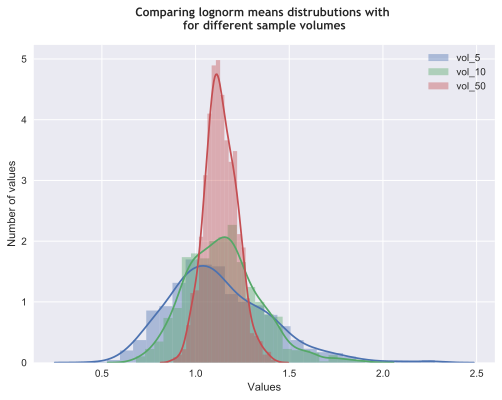

In [11]:
fig, ax = plt.subplots(figsize = (8.27, 11.7/2))

data = {
    'vol_5': np.array(v_5),
    'vol_10': np.array(v_10),
    'vol_50': np.array(v_50)
}
for key in data:
    sns.distplot(data[key], label=key)

plt.xlabel('Values')
plt.ylabel('Number of values')
plt.title('Comparing lognorm means distrubutions with \nfor different sample volumes', y = 1.03, fontsize = 12, \
              fontweight = 'bold', fontname = 'Trebuchet MS')
plt.legend();

#### <center>Теоретическое распределение выборочного среднего представлено как:</center> $$\exp\left(\mu+\frac{\sigma^2}{2}\right)$$
#### <center> Теоретическое распределение дисперсии:</center> $$[\exp(\sigma^2)-1] \exp(2\mu+\sigma^2)$$

*источник https://en.wikipedia.org/wiki/Log-normal_distribution

Построим KDE для теоретического распределения.

/Users/artem/miniconda3/envs/mldaspec/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


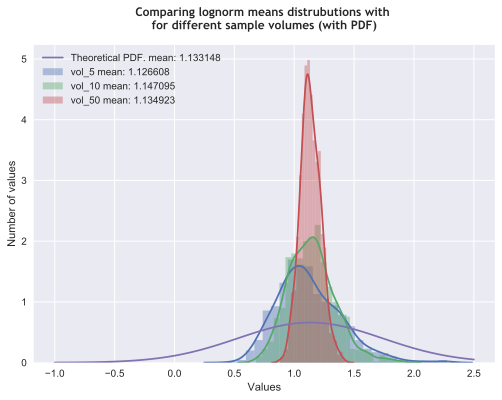

In [12]:
fig, ax = plt.subplots(figsize = (8.27, 11.7/2))

# вычисляем значения для PDF нормального распределения
mean_mu = np.exp(mu + (sigma**2)/2)
mean_sigma = np.sqrt((np.exp(sigma**2)-1)*(np.exp(2*mu+sigma**2)))

# строим график
x = np.linspace(-1,2.5,50)
y = sts.norm(loc=mean_mu, scale=mean_sigma).pdf(x)
for key in data:
    sns.distplot(data[key], label=(key+f' mean: {round(data[key].mean(), 6)}'))

plt.plot(x,y, label=(f'Theoretical PDF. mean: {round(mean_mu, 6)}'));
plt.xlabel('Values')
plt.ylabel('Number of values')
plt.title('Comparing lognorm means distrubutions with \nfor different sample volumes (with PDF)',
          y = 1.03, fontsize = 12,
          fontweight = 'bold',
          fontname = 'Trebuchet MS')

plt.legend();

 ### Вывод: 
 Как видим, чем больше объем выборки, тем ближе значение среднего выборочного к теоретическому – точность аппроксимации распределения увеличивается. 